<a href="https://colab.research.google.com/github/taechanha/inverseDesignMetaMatl/blob/main/%5Br%5D_w_o_transpose%3B_0_1_(351)_%26_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################

import numpy as np
import matplotlib.pyplot as plt

f = open("/content/dataset_2.txt", 'r')
data = []
length = 0
for i in f:
  new = []
  new.append(i)
  data.append(new)
  # length of dataset
  length += 1

f.close()

# create dataset from data
dataset = []
for i in range(length):
  new = []
  for j in data[i][0].split(','):
    new.append(float(j))
  dataset.append(new)

edge_index = dataset

# trim out label from dataset
# Ex Ey Ez
label = []
new = []
for line in dataset:
  tmp = []
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.reverse()
  label.append(tmp)

print("shape of label: ", np.array(label).shape)
print("shape of dataset: ", np.array(dataset).shape)

# whole dataset to Tensor & train/test split
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

edge_index = torch.FloatTensor(edge_index)
label = torch.FloatTensor(label)

split = int(length * 0.8)

x_train = edge_index[:split]
y_train = label[:split]
x_val = edge_index[split:]
y_val = label[split:]

print("x_train, y_train, x_val shape: ", x_train.shape, y_train.shape, x_val.shape)

# create torch dataset
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, label, dataset, transform=None, target_transform=None):
        self.labels = label
        self.dataset = dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        data = self.dataset[idx]
        label = self.labels[idx]
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

# create DataLoader
from torch.utils.data import DataLoader

training_data   = CustomDataset(label=y_train, dataset=x_train)
test_data       = CustomDataset(label=y_val, dataset=x_val)
train_loader    = DataLoader(training_data, batch_size=4, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=4, shuffle=False)

shape of label:  (2000, 3)
shape of dataset:  (2000, 351)
x_train, y_train, x_val shape:  torch.Size([1600, 351]) torch.Size([1600, 3]) torch.Size([400, 351])


In [7]:
epochs = 500

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 3)

        nn.init.xavier_uniform_(self.fc1.weight)
        #nn.init.xavier_uniform_(self.fc2.weight)
        #nn.init.xavier_uniform_(self.fc3.weight)
        #nn.init.xavier_uniform_(self.fc4.weight)
        #nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        # x = F.leaky_relu(x)
        # x = self.fc2(x)
        # x = F.leaky_relu(x)
        # x = self.fc3(x)
        # x = F.leaky_relu(x)
        # x = self.fc4(x)
        # x = F.leaky_relu(x)
        # x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data)
        #nn.init.xavier_uniform_(m.weight.data)
        #nn.init.xavier_uniform_(m.bias.data)

torch.manual_seed(42)
model = DNN().cuda()
model.apply(weights_init)
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=3, bias=True)
)


In [9]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

1056

In [10]:
def train(model, train_losses, epoch):
    model.train()
    train_loss = 0
    for x, y in train_loader:
        x, y = x.cuda().float(), y.cuda()
        optimizer.zero_grad()
        o = model(x)
        loss = loss_function(o, y)
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    print('====> Epoch: {} loss: {:.4f}'.format(e, train_loss / len(train_loader)))
    train_losses.append(train_loss / len(train_loader))

def test(model, val_losses):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.cuda().float(), y.cuda()       
            o = model(x)
            loss = loss_function(o, y)
            
            test_loss += loss.item()
    print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))
    val_losses.append(test_loss / len(test_loader))


def test_pred(model):
    y_pred = []
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.cuda().float(), y.cuda()       
            o = model(x)
            y_pred.append(o)

            loss = loss_function(o, y)
            test_loss += loss.item()
    print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

    return y_pred

In [11]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_function = nn.MSELoss()
epochs = epochs

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 118.9758
====> Test set loss: 114.9198
====> Epoch: 2 loss: 113.4071
====> Test set loss: 109.5016
====> Epoch: 3 loss: 108.0643
====> Test set loss: 104.3159
====> Epoch: 4 loss: 102.9628
====> Test set loss: 99.3644
====> Epoch: 5 loss: 98.0977
====> Test set loss: 94.6321
====> Epoch: 6 loss: 93.4373
====> Test set loss: 90.1047
====> Epoch: 7 loss: 88.9839
====> Test set loss: 85.7998
====> Epoch: 8 loss: 84.7373
====> Test set loss: 81.6909
====> Epoch: 9 loss: 80.6828
====> Test set loss: 77.7208
====> Epoch: 10 loss: 76.8125
====> Test set loss: 73.9707
====> Epoch: 11 loss: 73.1256
====> Test set loss: 70.3859
====> Epoch: 12 loss: 69.6213
====> Test set loss: 66.9957
====> Epoch: 13 loss: 66.2895
====> Test set loss: 63.7658
====> Epoch: 14 loss: 63.1191
====> Test set loss: 60.6973
====> Epoch: 15 loss: 60.1160
====> Test set loss: 57.7888
====> Epoch: 16 loss: 57.2822
====> Test set loss: 55.0478
====> Epoch: 17 loss: 54.5979
====> Test set loss: 52.4561

In [12]:
y1 = y_pred

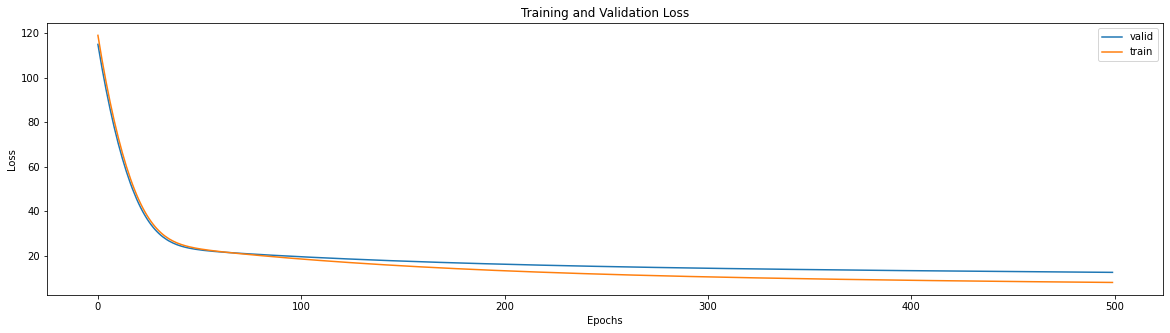

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss), label="valid")
plt.plot(np.array(tloss), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 3.4228


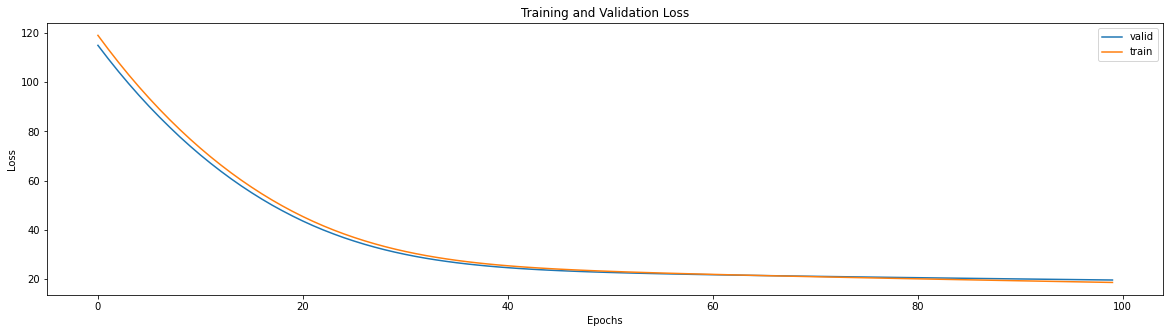

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[:100]), label="valid")
plt.plot(np.array(tloss[:100]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [13]:
###

In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 6)
        self.fc2 = nn.Linear(6, 3)

        #nn.init.xavier_normal_(self.fc1.weight)
        #nn.init.xavier_normal_(self.fc2.weight)
        #nn.init.xavier_uniform_(self.fc1.weight)
        #nn.init.xavier_uniform_(self.fc2.weight)
        #nn.init.xavier_uniform_(self.fc3.weight)
        #nn.init.xavier_uniform_(self.fc4.weight)
        #nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        x = F.relu(x)
        x = self.fc2(x)
        # x = F.leaky_relu(x)
        # x = self.fc3(x)
        # x = F.leaky_relu(x)
        # x = self.fc4(x)
        # x = F.leaky_relu(x)
        # x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, nn.init.calculate_gain('relu'))
        #nn.init.xavier_uniform_(m.bias.data)

torch.manual_seed(42)
model = DNN().cuda()
model.apply(weights_init)
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=3, bias=True)
)


In [114]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

2133

In [115]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_function = nn.MSELoss()
epochs = epochs

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 126.0295
====> Test set loss: 124.0222
====> Epoch: 2 loss: 123.1963
====> Test set loss: 121.2526
====> Epoch: 3 loss: 120.2805
====> Test set loss: 117.9592
====> Epoch: 4 loss: 116.6919
====> Test set loss: 114.0257
====> Epoch: 5 loss: 112.4329
====> Test set loss: 109.3762
====> Epoch: 6 loss: 107.4511
====> Test set loss: 103.9750
====> Epoch: 7 loss: 101.5145
====> Test set loss: 97.4404
====> Epoch: 8 loss: 94.6115
====> Test set loss: 90.1815
====> Epoch: 9 loss: 87.1474
====> Test set loss: 82.5478
====> Epoch: 10 loss: 79.4741
====> Test set loss: 74.8486
====> Epoch: 11 loss: 71.7226
====> Test set loss: 67.0196
====> Epoch: 12 loss: 63.8985
====> Test set loss: 59.2194
====> Epoch: 13 loss: 56.2183
====> Test set loss: 51.7185
====> Epoch: 14 loss: 48.9550
====> Test set loss: 44.7429
====> Epoch: 15 loss: 42.4518
====> Test set loss: 38.8324
====> Epoch: 16 loss: 37.1117
====> Test set loss: 34.1415
====> Epoch: 17 loss: 33.0565
====> Test set loss: 3

In [116]:
y2 = y_pred

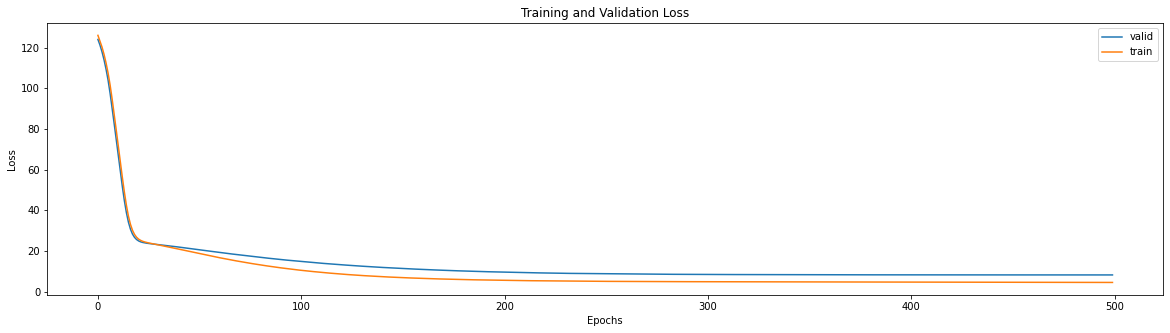

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss), label="valid")
plt.plot(np.array(tloss), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [120]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)        
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 2.7806


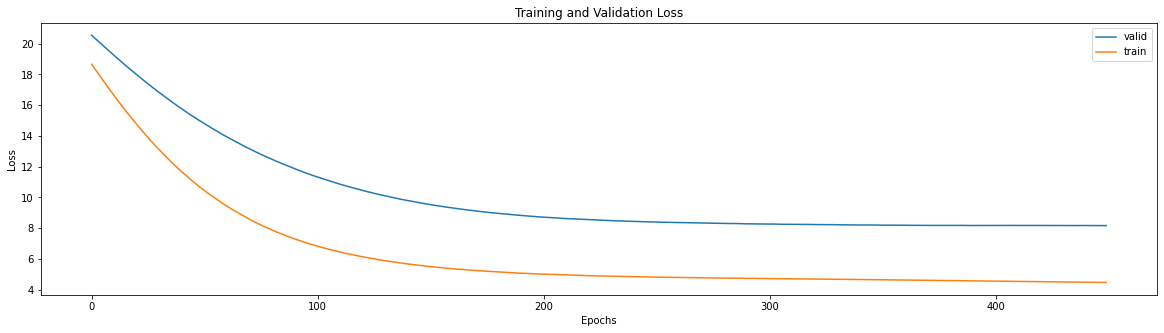

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[50:500]), label="valid")
plt.plot(np.array(tloss[50:500]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [20]:
###

In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 175)
        self.fc2 = nn.Linear(175, 87)
        self.fc3 = nn.Linear(87, 3)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        #nn.init.xavier_uniform_(self.fc4.weight)
        #nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        # x = F.leaky_relu(x)
        # x = self.fc4(x)
        # x = F.leaky_relu(x)
        # x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, nn.init.calculate_gain('relu'))
        #nn.init.xavier_uniform_(m.weight.data)
        #nn.init.xavier_uniform_(m.bias.data)

torch.manual_seed(42)
model = DNN().cuda()
model.apply(weights_init)
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=175, bias=True)
  (fc2): Linear(in_features=175, out_features=87, bias=True)
  (fc3): Linear(in_features=87, out_features=3, bias=True)
)


In [88]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

77176

In [89]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_function = nn.MSELoss()
epochs = epochs

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 72.6431
====> Test set loss: 29.3078
====> Epoch: 2 loss: 27.0576
====> Test set loss: 24.8254
====> Epoch: 3 loss: 24.4604
====> Test set loss: 23.7138
====> Epoch: 4 loss: 22.4476
====> Test set loss: 22.6997
====> Epoch: 5 loss: 20.5371
====> Test set loss: 21.7170
====> Epoch: 6 loss: 18.6978
====> Test set loss: 20.6721
====> Epoch: 7 loss: 16.8310
====> Test set loss: 19.6042
====> Epoch: 8 loss: 14.9543
====> Test set loss: 18.6400
====> Epoch: 9 loss: 13.0962
====> Test set loss: 17.5294
====> Epoch: 10 loss: 11.2808
====> Test set loss: 16.4745
====> Epoch: 11 loss: 9.6863
====> Test set loss: 15.5289
====> Epoch: 12 loss: 8.2980
====> Test set loss: 14.7147
====> Epoch: 13 loss: 7.1383
====> Test set loss: 13.9358
====> Epoch: 14 loss: 6.1748
====> Test set loss: 13.2758
====> Epoch: 15 loss: 5.3995
====> Test set loss: 12.6626
====> Epoch: 16 loss: 4.7408
====> Test set loss: 12.1686
====> Epoch: 17 loss: 4.2079
====> Test set loss: 11.6833
====> Epoch: 

In [90]:
y3 = y_pred

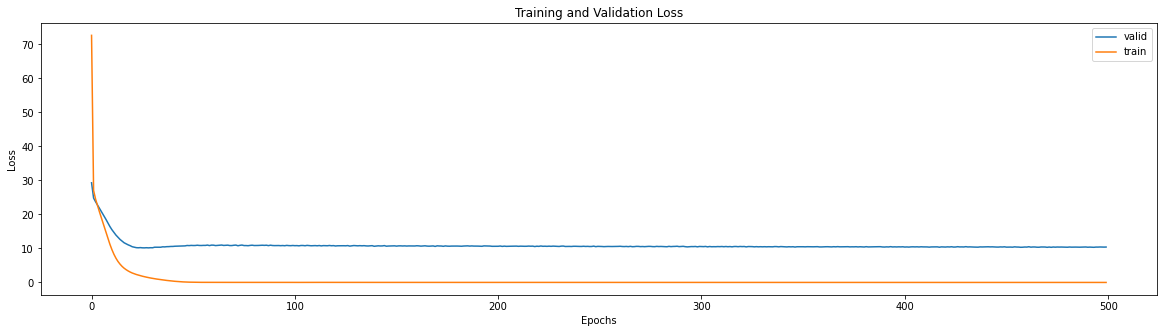

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss), label="valid")
plt.plot(np.array(tloss), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [92]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 3.1105


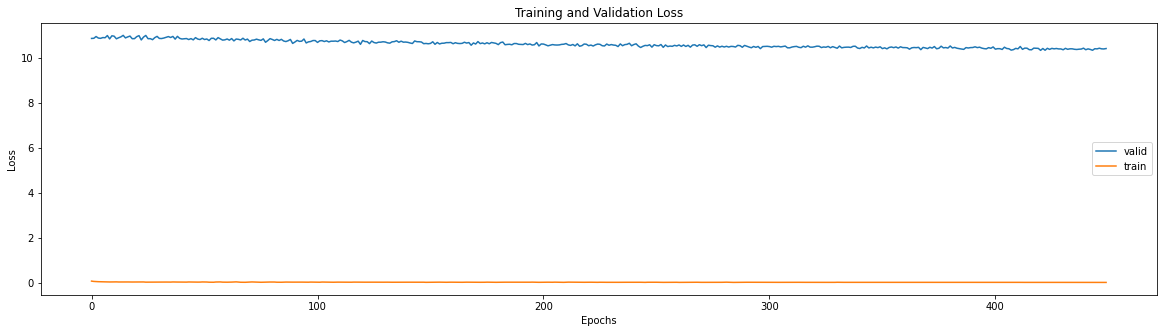

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[50:500]), label="valid")
plt.plot(np.array(tloss[50:500]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [27]:
###

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 175)
        self.fc2 = nn.Linear(175, 87)
        self.fc3 = nn.Linear(87, 43)
        self.fc4 = nn.Linear(43, 3)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)
        #nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        # x = F.leaky_relu(x)
        # x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, nn.init.calculate_gain('relu'))
        #nn.init.xavier_uniform_(m.weight.data)
        #nn.init.xavier_uniform_(m.bias.data)

torch.manual_seed(42)
model = DNN().cuda()
model.apply(weights_init)
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=175, bias=True)
  (fc2): Linear(in_features=175, out_features=87, bias=True)
  (fc3): Linear(in_features=87, out_features=43, bias=True)
  (fc4): Linear(in_features=43, out_features=3, bias=True)
)


In [72]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

80828

In [73]:
epochs = 500

In [74]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_function = nn.MSELoss()
epochs = epochs

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 71.9160
====> Test set loss: 26.7382
====> Epoch: 2 loss: 27.1708
====> Test set loss: 25.0360
====> Epoch: 3 loss: 24.1540
====> Test set loss: 23.8977
====> Epoch: 4 loss: 21.6678
====> Test set loss: 22.3609
====> Epoch: 5 loss: 19.1725
====> Test set loss: 20.9994
====> Epoch: 6 loss: 16.6386
====> Test set loss: 19.6782
====> Epoch: 7 loss: 14.1838
====> Test set loss: 18.3764
====> Epoch: 8 loss: 11.8595
====> Test set loss: 17.0946
====> Epoch: 9 loss: 9.7722
====> Test set loss: 15.9639
====> Epoch: 10 loss: 8.0597
====> Test set loss: 14.9971
====> Epoch: 11 loss: 6.6403
====> Test set loss: 14.0746
====> Epoch: 12 loss: 5.4913
====> Test set loss: 13.4981
====> Epoch: 13 loss: 4.5779
====> Test set loss: 12.8134
====> Epoch: 14 loss: 3.8807
====> Test set loss: 12.4213
====> Epoch: 15 loss: 3.3319
====> Test set loss: 12.0144
====> Epoch: 16 loss: 2.8952
====> Test set loss: 11.8128
====> Epoch: 17 loss: 2.5247
====> Test set loss: 11.6567
====> Epoch: 18

In [75]:
y4 = y_pred

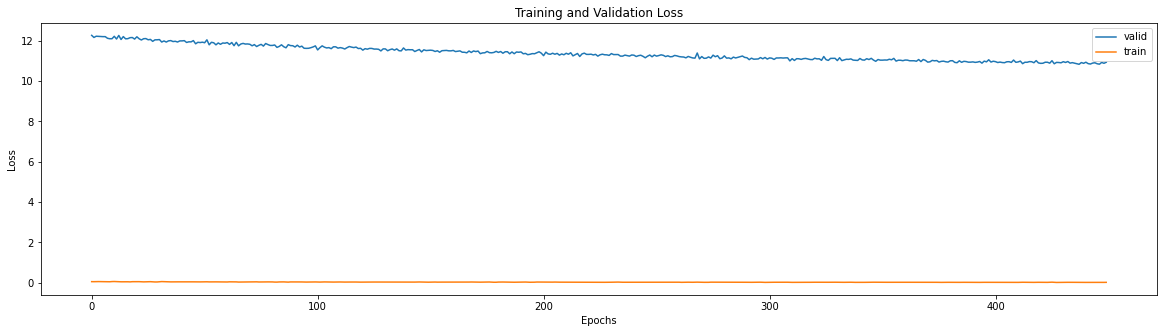

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[50:500]), label="valid")
plt.plot(np.array(tloss[50:500]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [77]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 3.1934


In [49]:
###

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()

        self.fc1 = nn.Linear(351, 175)
        self.fc2 = nn.Linear(175, 87)
        self.fc3 = nn.Linear(87, 43)
        self.fc4 = nn.Linear(43, 21)
        self.fc5 = nn.Linear(21, 3)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)
        nn.init.xavier_uniform_(self.fc5.weight)
        #nn.init.xavier_uniform_(self.fc6.weight)
        #nn.init.xavier_uniform_(self.fc7.weight)

    def forward(self, x):
        x = self.fc1(x.view(-1, 351))
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        # x = F.leaky_relu(x)
        # x = self.fc6(x)
        # x = F.leaky_relu(x)
        
        return x


def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, nn.init.calculate_gain('relu'))
        #nn.init.xavier_uniform_(m.weight.data)
        #nn.init.xavier_uniform_(m.bias.data)

torch.manual_seed(42)
model = DNN().cuda()
model.apply(weights_init)
print(model)

DNN(
  (fc1): Linear(in_features=351, out_features=175, bias=True)
  (fc2): Linear(in_features=175, out_features=87, bias=True)
  (fc3): Linear(in_features=87, out_features=43, bias=True)
  (fc4): Linear(in_features=43, out_features=21, bias=True)
  (fc5): Linear(in_features=21, out_features=3, bias=True)
)


In [51]:
# the number of trainable parameter
sum(p.numel() for p in model.parameters() if p.requires_grad)

81686

In [52]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_function = nn.MSELoss()
epochs = epochs

# for loss plot
tloss = []
vloss = []

for e in range(1, epochs+1):
    train(model, tloss, e)
    test(model, vloss)

y_pred = test_pred(model)

====> Epoch: 1 loss: 57.3531
====> Test set loss: 27.3304
====> Epoch: 2 loss: 26.9898
====> Test set loss: 25.5016
====> Epoch: 3 loss: 24.0430
====> Test set loss: 24.2152
====> Epoch: 4 loss: 21.3943
====> Test set loss: 23.0239
====> Epoch: 5 loss: 18.8062
====> Test set loss: 21.7690
====> Epoch: 6 loss: 16.3605
====> Test set loss: 20.5486
====> Epoch: 7 loss: 13.9873
====> Test set loss: 19.3074
====> Epoch: 8 loss: 11.7812
====> Test set loss: 18.0811
====> Epoch: 9 loss: 9.8103
====> Test set loss: 16.7858
====> Epoch: 10 loss: 8.0811
====> Test set loss: 15.6745
====> Epoch: 11 loss: 6.6185
====> Test set loss: 14.7053
====> Epoch: 12 loss: 5.4547
====> Test set loss: 14.0427
====> Epoch: 13 loss: 4.5206
====> Test set loss: 13.2679
====> Epoch: 14 loss: 3.7856
====> Test set loss: 12.7815
====> Epoch: 15 loss: 3.2147
====> Test set loss: 12.4190
====> Epoch: 16 loss: 2.7522
====> Test set loss: 12.2503
====> Epoch: 17 loss: 2.3797
====> Test set loss: 12.1092
====> Epoch: 18

In [53]:
y5 = y_pred

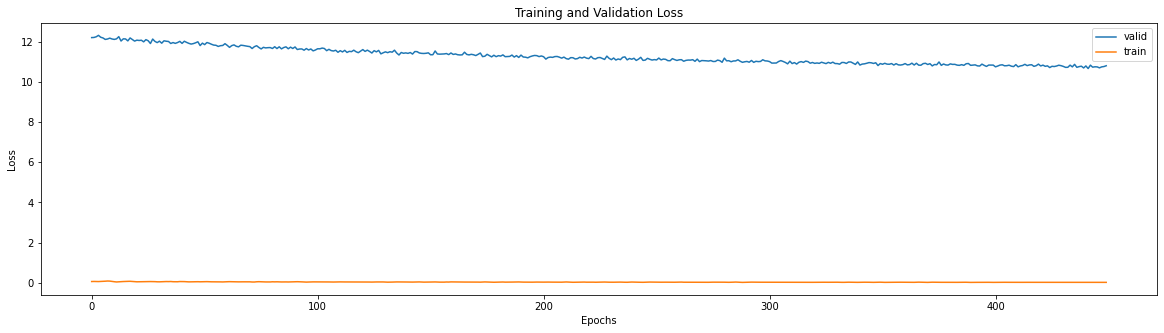

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title("Training and Validation Loss")
plt.plot(np.array(vloss[50:500]), label="valid")
plt.plot(np.array(tloss[50:500]), label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [55]:
# RMSE

model.eval()
test_loss = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda().float(), y.cuda()       
        o = model(x)
        loss = torch.sqrt(loss_function(o, y))
        
        test_loss += loss.item()
print('====> Test set loss: {:.4f}'.format(test_loss / len(test_loader)))

====> Test set loss: 3.1743
